In [39]:
import pandas as pd
import scipy
import numpy as np

In [40]:
birth = pd.Series((241945, 251527), index=['female', 'male'])

In [41]:
from scipy.special import comb

In [42]:
k = birth['female']
print(k)
N = birth['female'] + birth['male']
print(N)

241945
493472


In [43]:
comb(N, k)

inf

In [44]:
theta_0 = 0.5

In [45]:
theta_0**k # too small

0.0

In [46]:
theta_t = theta_0
w = 0.01 # windows size
# metropolis hasdings
thetas = []
for i in range(5000):
    theta_p =  np.random.uniform(max(theta_t - w, 0), min(theta_t + w, 1))
    alpha = np.exp(k*np.log(theta_p/theta_t) + (N-k)*np.log((1-theta_p)/(1-theta_t)))
    # don't go below 0 or 1, it has to be a prob
    if np.random.uniform(0,1) <= alpha:
        theta_t = theta_p
    thetas.append(theta_t)

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

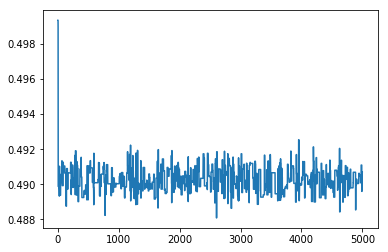

In [48]:
plt.plot(thetas)
# thermalization: until a certain point the data is not stable

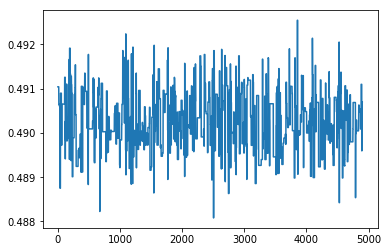

In [49]:
plt.plot(thetas[100:])

(array([  25.,  222.,  970., 1450., 1420.,  741.,  155.,   13.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    4.]),
 array([0.48808059, 0.48864435, 0.4892081 , 0.48977185, 0.49033561,
        0.49089936, 0.49146311, 0.49202687, 0.49259062, 0.49315438,
        0.49371813, 0.49428188, 0.49484564, 0.49540939, 0.49597314,
        0.4965369 , 0.49710065, 0.4976644 , 0.49822816, 0.49879191,
        0.49935566]),
 <a list of 20 Patch objects>)

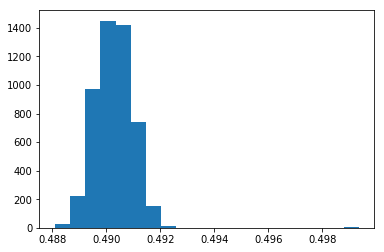

In [50]:
plt.hist(thetas, bins=20)
# proportinal to the probability of the given theta

In [51]:
prob_femalebirth = np.mean(np.array(thetas[:100]) < 0.5)
print(prob_femalebirth)

1.0


In [52]:
prob_femalebirth = np.mean(np.array(thetas[:100]) < 0.49)
print(prob_femalebirth)

0.54


In [53]:
np.quantile(thetas[:100], [0.025, 0.5, 0.975]) # confidence intervals
# tigth interval

array([0.4893771 , 0.48992394, 0.49917585])

In [54]:
from scipy.stats import beta

In [55]:
xs = np.linspace(0.4, 0.6, 50)

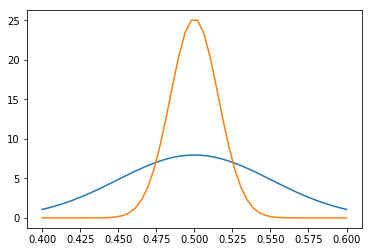

In [56]:
plt.plot(xs, beta.pdf(xs, 50, 50))
plt.plot(xs, beta.pdf(xs, 500, 500))

In [57]:
theta_t = theta_0
w = 0.01 # windows size
# metropolis hasdings
thetas = []
for i in range(5000):
    theta_p =  np.random.uniform(max(theta_t - w, 0), min(theta_t + w, 1))
    alpha = np.exp(k*np.log(theta_p/theta_t) + (N-k)*np.log((1-theta_p)/(1-theta_t)))
    alpha *= beta.pdf(theta_p, 500, 500) / beta.pdf(theta_t, 500, 500) # add prior p
    # don't go below 0 or 1, it has to be a prob
    if np.random.uniform(0,1) <= alpha:
        theta_t = theta_p
    thetas.append(theta_t)

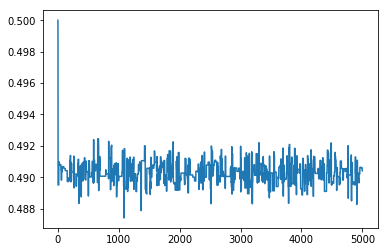

In [58]:
plt.plot(thetas)
# thermalization: until a certain point the data is not stable, faster HERE

(array([  11.,   29.,  362.,  931., 1912., 1246.,  403.,   90.,   14.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    2.]),
 array([0.48740454, 0.48803431, 0.48866408, 0.48929386, 0.48992363,
        0.4905534 , 0.49118318, 0.49181295, 0.49244272, 0.4930725 ,
        0.49370227, 0.49433204, 0.49496181, 0.49559159, 0.49622136,
        0.49685113, 0.49748091, 0.49811068, 0.49874045, 0.49937023,
        0.5       ]),
 <a list of 20 Patch objects>)

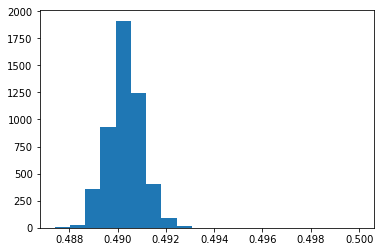

In [59]:
plt.hist(thetas, bins=20)
# proportinal to the probability of the given theta

In [60]:
np.quantile(thetas[:100], [0.025, 0.5, 0.975]) # confidence intervals
# tigth interval

array([0.48950396, 0.49067192, 0.4909895 ])